In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras as kera
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input, Flatten
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, MeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.activations import linear

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import sqrt

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
train_df.head(10)

,id,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,target
0,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
1,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
2,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
3,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
4,13,A,B,A,A,A,A,A,A,B,...,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
5,14,A,A,A,A,B,A,A,A,A,...,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
6,20,A,B,A,B,A,A,A,A,B,...,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
7,23,A,B,B,B,B,A,A,A,B,...,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191,10280.20
8,24,A,B,A,A,B,B,A,A,B,...,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,6184.59
9,33,A,B,A,A,B,A,A,A,B,...,0.314683,0.370419,0.58354,0.46226,0.38016,0.644013,0.665644,0.339244,0.799124,5965.73


In [4]:
train_df.tail(10)

,id,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,target
169476,587605,B,A,A,A,A,B,A,A,A,...,0.599275,0.548122,0.48864,0.45391,0.64056,0.592525,0.590961,0.701266,0.362479,1173.30
169477,587606,A,A,A,A,B,A,A,A,A,...,0.201125,0.259395,0.24564,0.30859,0.21983,0.207238,0.204687,0.357400,0.348217,2161.12
169478,587607,A,B,A,B,B,B,A,A,B,...,0.269520,0.338963,0.33906,0.28066,0.30529,0.245410,0.261799,0.181433,0.398571,4080.42
169479,587612,A,A,A,A,B,A,A,A,A,...,0.502705,0.473897,0.43518,0.66201,0.58257,0.415029,0.406090,0.354344,0.377315,994.85
169480,587619,A,A,A,A,A,B,A,A,A,...,0.445008,0.377930,0.36636,0.29095,0.44467,0.327915,0.321570,0.731059,0.721499,804.28
169481,587620,A,B,A,A,A,A,A,A,B,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
169482,587624,A,A,A,A,A,B,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
169483,587630,A,B,A,A,A,A,A,B,B,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
169484,587632,A,B,A,A,A,A,A,A,B,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87
169485,587633,B,A,A,B,A,A,A,A,A,...,0.844563,0.533048,0.97123,0.93383,0.83814,0.932195,0.946432,0.810511,0.721460,4751.72


In [5]:
%%time
cat = [f'col_{i}' for i in range(1, 117)]
con = [f'col_{i}' for i in range(117, 131)]
for c in cat:
    train_df[c] = train_df[c].astype('category')
    test_df[c] = test_df[c].astype('category')
    train_df[c] = train_df[c].cat.codes
    test_df[c] = test_df[c].cat.codes
del c
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

Wall time: 5.87 s


In [6]:
train_df.columns

Index(['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8',
       'col_9', 'col_10',
       ...
       'col_122', 'col_123', 'col_124', 'col_125', 'col_126', 'col_127',
       'col_128', 'col_129', 'col_130', 'target'],
      dtype='object', length=131)

In [7]:
X = train_df.iloc[:,train_df.columns != 'target'].values
y = train_df.iloc[:,train_df.columns == 'target'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)
del X, y

In [9]:
X_train.shape

(95335, 130)

In [10]:
activation_fn = 'relu'
model = Sequential()
model.add(Input(shape=(130,)))
model.add(Dense(130, activation=activation_fn))
model.add(Dense(65, activation=activation_fn))
model.add(Dense(1, activation=activation_fn))
model.compile(optimizer=RMSprop(learning_rate=1e-3), loss=MeanSquaredError(), metrics=['mse', 'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 130)               17030     
_________________________________________________________________
dense_1 (Dense)              (None, 65)                8515      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 66        
Total params: 25,611
Trainable params: 25,611
Non-trainable params: 0
_________________________________________________________________


In [11]:
%%time
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), initial_epoch=0)

Epoch 1/10
2980/2980 [==============================] - 2s 648us/step - loss: 6126043.5000 - mse: 6126043.5000 - mae: 1566.8502 - val_loss: 4953128.0000 - val_mse: 4953128.0000 - val_mae: 1436.3694
Epoch 2/10
2980/2980 [==============================] - 2s 614us/step - loss: 4570199.5000 - mse: 4570199.5000 - mae: 1342.1836 - val_loss: 4650483.5000 - val_mse: 4650483.5000 - val_mae: 1383.1484
Epoch 3/10
2980/2980 [==============================] - 2s 614us/step - loss: 4426703.5000 - mse: 4426703.5000 - mae: 1321.6324 - val_loss: 4505095.0000 - val_mse: 4505095.0000 - val_mae: 1273.6415
Epoch 4/10
2980/2980 [==============================] - 2s 582us/step - loss: 4336921.0000 - mse: 4336921.0000 - mae: 1311.0487 - val_loss: 4496669.0000 - val_mse: 4496669.0000 - val_mae: 1255.9659
Epoch 5/10
2980/2980 [==============================] - 2s 621us/step - loss: 4299717.0000 - mse: 4299717.0000 - mae: 1301.8311 - val_loss: 4365507.0000 - val_mse: 4365507.0000 - val_mae: 1286.7231
Epoch 6/10

In [12]:
%%time
model.save('model_10.h5')

Wall time: 139 ms


In [13]:
%%time
new_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), initial_epoch=10)
model.save('model_20.h5')

Epoch 11/20
2980/2980 [==============================] - 2s 637us/step - loss: 4169206.2500 - mse: 4169206.2500 - mae: 1277.9741 - val_loss: 4264449.5000 - val_mse: 4264449.5000 - val_mae: 1280.9025
Epoch 12/20
2980/2980 [==============================] - 2s 619us/step - loss: 4161635.0000 - mse: 4161635.0000 - mae: 1274.9854 - val_loss: 4327682.0000 - val_mse: 4327682.0000 - val_mae: 1315.6434
Epoch 13/20
2980/2980 [==============================] - 2s 614us/step - loss: 4150972.7500 - mse: 4150972.7500 - mae: 1275.5328 - val_loss: 4512591.5000 - val_mse: 4512591.5000 - val_mae: 1226.9841
Epoch 14/20
2980/2980 [==============================] - 2s 623us/step - loss: 4126653.5000 - mse: 4126653.5000 - mae: 1272.7175 - val_loss: 4648491.0000 - val_mse: 4648491.0000 - val_mae: 1451.1581
Epoch 15/20
2980/2980 [==============================] - 2s 599us/step - loss: 4135847.2500 - mse: 4135847.2500 - mae: 1271.2240 - val_loss: 4400016.0000 - val_mse: 4400016.0000 - val_mae: 1365.1007
Epoch

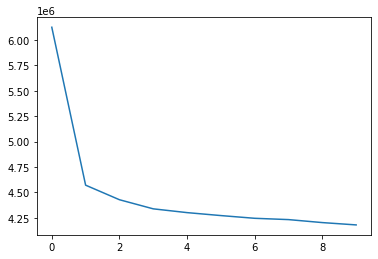

In [14]:
plt.plot(history.history['mse'])

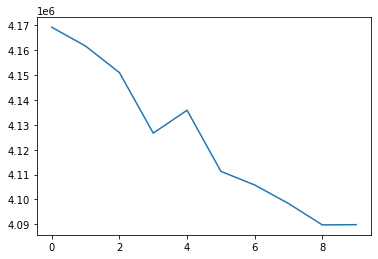

In [15]:
plt.plot(new_history.history['mse'])

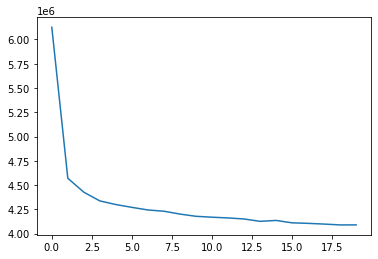

In [16]:
plt.plot(history.history['mse'] + new_history.history['mse'])

In [17]:
mse_history = history.history['mse'] + new_history.history['mse']
mae_history = history.history['mae'] + new_history.history['mae']

In [18]:
%%time
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), initial_epoch=20)
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save('model_50.h5')

Epoch 21/50
2980/2980 [==============================] - 2s 615us/step - loss: 4079656.7500 - mse: 4079656.7500 - mae: 1263.3772 - val_loss: 4212744.0000 - val_mse: 4212744.0000 - val_mae: 1255.0126
Epoch 22/50
2980/2980 [==============================] - 2s 613us/step - loss: 4072971.5000 - mse: 4072971.5000 - mae: 1262.4266 - val_loss: 4245017.0000 - val_mse: 4245017.0000 - val_mae: 1305.0983
Epoch 23/50
2980/2980 [==============================] - 2s 632us/step - loss: 4059501.7500 - mse: 4059501.7500 - mae: 1263.2958 - val_loss: 4265030.5000 - val_mse: 4265030.5000 - val_mae: 1232.6063
Epoch 24/50
2980/2980 [==============================] - 2s 628us/step - loss: 4056096.2500 - mse: 4056096.2500 - mae: 1261.6729 - val_loss: 4381055.0000 - val_mse: 4381055.0000 - val_mae: 1360.5577
Epoch 25/50
2980/2980 [==============================] - 2s 606us/step - loss: 4056886.7500 - mse: 4056886.7500 - mae: 1260.1407 - val_loss: 4212773.0000 - val_mse: 4212773.0000 - val_mae: 1225.2744
Epoch

In [19]:
%%time
init_epochs = 50
epochs_now = 100
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save(f'model_{epochs_now}.h5')

Epoch 51/100
2980/2980 [==============================] - 2s 642us/step - loss: 3971036.5000 - mse: 3971036.5000 - mae: 1249.8239 - val_loss: 4194657.0000 - val_mse: 4194657.0000 - val_mae: 1272.3370
Epoch 52/100
2980/2980 [==============================] - 2s 646us/step - loss: 3976174.2500 - mse: 3976174.2500 - mae: 1250.3899 - val_loss: 4129002.7500 - val_mse: 4129002.7500 - val_mae: 1240.7622
Epoch 53/100
2980/2980 [==============================] - 2s 614us/step - loss: 3987116.5000 - mse: 3987116.5000 - mae: 1252.2312 - val_loss: 4270220.0000 - val_mse: 4270220.0000 - val_mae: 1335.6285
Epoch 54/100
2980/2980 [==============================] - 2s 640us/step - loss: 3967713.7500 - mse: 3967713.7500 - mae: 1250.0272 - val_loss: 4192294.7500 - val_mse: 4192294.7500 - val_mae: 1250.0156
Epoch 55/100
2980/2980 [==============================] - 2s 617us/step - loss: 3970556.2500 - mse: 3970556.2500 - mae: 1249.2461 - val_loss: 4261058.5000 - val_mse: 4261058.5000 - val_mae: 1315.3641


Epoch 92/100
2980/2980 [==============================] - 2s 621us/step - loss: 3896107.7500 - mse: 3896107.7500 - mae: 1239.0640 - val_loss: 4263063.5000 - val_mse: 4263063.5000 - val_mae: 1223.5905
Epoch 93/100
2980/2980 [==============================] - 2s 596us/step - loss: 3881028.0000 - mse: 3881028.0000 - mae: 1237.0875 - val_loss: 4125886.5000 - val_mse: 4125886.5000 - val_mae: 1257.9229
Epoch 94/100
2980/2980 [==============================] - 2s 611us/step - loss: 3882825.0000 - mse: 3882825.0000 - mae: 1236.3743 - val_loss: 4107913.0000 - val_mse: 4107913.0000 - val_mae: 1264.8370
Epoch 95/100
2980/2980 [==============================] - 2s 619us/step - loss: 3885643.5000 - mse: 3885643.5000 - mae: 1237.0381 - val_loss: 4210567.0000 - val_mse: 4210567.0000 - val_mae: 1222.7407
Epoch 96/100
2980/2980 [==============================] - 2s 594us/step - loss: 3891318.2500 - mse: 3891318.2500 - mae: 1236.7332 - val_loss: 4165110.5000 - val_mse: 4165110.5000 - val_mae: 1227.9166


In [20]:
%%time
init_epochs = 100
epochs_now = 500
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save(f'model_{epochs_now}.h5')

Epoch 101/500
2980/2980 [==============================] - 2s 620us/step - loss: 3875644.5000 - mse: 3875644.5000 - mae: 1235.2260 - val_loss: 4258075.0000 - val_mse: 4258075.0000 - val_mae: 1215.8136
Epoch 102/500
2980/2980 [==============================] - 2s 598us/step - loss: 3869045.5000 - mse: 3869045.5000 - mae: 1234.7328 - val_loss: 4231273.5000 - val_mse: 4231273.5000 - val_mae: 1293.5115
Epoch 103/500
2980/2980 [==============================] - 2s 625us/step - loss: 3865903.0000 - mse: 3865903.0000 - mae: 1234.8359 - val_loss: 4159348.2500 - val_mse: 4159348.2500 - val_mae: 1294.1487
Epoch 104/500
2980/2980 [==============================] - 2s 596us/step - loss: 3875598.7500 - mse: 3875598.7500 - mae: 1235.5380 - val_loss: 4154682.5000 - val_mse: 4154682.5000 - val_mae: 1251.7269
Epoch 105/500
2980/2980 [==============================] - 2s 618us/step - loss: 3875473.2500 - mse: 3875473.2500 - mae: 1234.6327 - val_loss: 4417381.0000 - val_mse: 4417381.0000 - val_mae: 1220.

Epoch 182/500
2980/2980 [==============================] - 2s 599us/step - loss: 3760466.5000 - mse: 3760466.5000 - mae: 1222.5129 - val_loss: 4159376.7500 - val_mse: 4159376.7500 - val_mae: 1225.1857
Epoch 183/500
2980/2980 [==============================] - 2s 615us/step - loss: 3765542.5000 - mse: 3765542.5000 - mae: 1221.3304 - val_loss: 4206198.5000 - val_mse: 4206198.5000 - val_mae: 1283.8293
Epoch 184/500
2980/2980 [==============================] - 2s 618us/step - loss: 3766623.7500 - mse: 3766623.7500 - mae: 1221.5154 - val_loss: 4193366.7500 - val_mse: 4193366.7500 - val_mae: 1224.1012
Epoch 185/500
2980/2980 [==============================] - 2s 606us/step - loss: 3747006.2500 - mse: 3747006.2500 - mae: 1222.5466 - val_loss: 4167298.7500 - val_mse: 4167298.7500 - val_mae: 1253.4458
Epoch 186/500
2980/2980 [==============================] - 2s 610us/step - loss: 3748541.0000 - mse: 3748541.0000 - mae: 1220.8695 - val_loss: 4176142.5000 - val_mse: 4176142.5000 - val_mae: 1279.

Epoch 223/500
2980/2980 [==============================] - 2s 604us/step - loss: 3700586.2500 - mse: 3700586.2500 - mae: 1216.6345 - val_loss: 4220249.0000 - val_mse: 4220249.0000 - val_mae: 1252.8683
Epoch 224/500
2980/2980 [==============================] - 2s 622us/step - loss: 3705799.5000 - mse: 3705799.5000 - mae: 1216.9202 - val_loss: 4429174.5000 - val_mse: 4429174.5000 - val_mae: 1292.4137
Epoch 225/500
2980/2980 [==============================] - 2s 598us/step - loss: 3715691.2500 - mse: 3715691.2500 - mae: 1214.8623 - val_loss: 4290462.5000 - val_mse: 4290462.5000 - val_mae: 1295.6301
Epoch 226/500
2980/2980 [==============================] - 2s 615us/step - loss: 3699858.7500 - mse: 3699858.7500 - mae: 1215.7985 - val_loss: 4292272.0000 - val_mse: 4292272.0000 - val_mae: 1314.6860
Epoch 227/500
2980/2980 [==============================] - 2s 595us/step - loss: 3721224.5000 - mse: 3721224.5000 - mae: 1215.5000 - val_loss: 4207736.5000 - val_mse: 4207736.5000 - val_mae: 1274.

Epoch 264/500
2980/2980 [==============================] - 2s 605us/step - loss: 3680161.7500 - mse: 3680161.7500 - mae: 1210.3309 - val_loss: 4171086.2500 - val_mse: 4171086.2500 - val_mae: 1231.0905
Epoch 265/500
2980/2980 [==============================] - 2s 610us/step - loss: 3667494.2500 - mse: 3667494.2500 - mae: 1210.6199 - val_loss: 4177500.7500 - val_mse: 4177500.7500 - val_mae: 1230.8971
Epoch 266/500
2980/2980 [==============================] - 2s 595us/step - loss: 3685395.5000 - mse: 3685395.5000 - mae: 1211.5326 - val_loss: 4244304.0000 - val_mse: 4244304.0000 - val_mae: 1231.8939
Epoch 267/500
2980/2980 [==============================] - 2s 604us/step - loss: 3668365.2500 - mse: 3668365.2500 - mae: 1211.5004 - val_loss: 4461377.5000 - val_mse: 4461377.5000 - val_mae: 1229.4178
Epoch 268/500
2980/2980 [==============================] - 2s 611us/step - loss: 3646077.2500 - mse: 3646077.2500 - mae: 1210.7751 - val_loss: 4789950.5000 - val_mse: 4789950.5000 - val_mae: 1347.

Epoch 305/500
2980/2980 [==============================] - 2s 595us/step - loss: 3619833.2500 - mse: 3619833.2500 - mae: 1207.2181 - val_loss: 4242789.5000 - val_mse: 4242789.5000 - val_mae: 1221.4695
Epoch 306/500
2980/2980 [==============================] - 2s 609us/step - loss: 3632682.5000 - mse: 3632682.5000 - mae: 1206.0553 - val_loss: 4212353.5000 - val_mse: 4212353.5000 - val_mae: 1272.4333
Epoch 307/500
2980/2980 [==============================] - 2s 609us/step - loss: 3614627.2500 - mse: 3614627.2500 - mae: 1206.3026 - val_loss: 4214395.0000 - val_mse: 4214395.0000 - val_mae: 1225.4137
Epoch 308/500
2980/2980 [==============================] - 2s 595us/step - loss: 3628477.7500 - mse: 3628477.7500 - mae: 1207.5321 - val_loss: 4235209.0000 - val_mse: 4235209.0000 - val_mae: 1240.3245
Epoch 309/500
2980/2980 [==============================] - 2s 620us/step - loss: 3627569.2500 - mse: 3627569.2500 - mae: 1206.9753 - val_loss: 4259466.0000 - val_mse: 4259466.0000 - val_mae: 1313.

Epoch 346/500
2980/2980 [==============================] - 2s 602us/step - loss: 3609235.0000 - mse: 3609235.0000 - mae: 1202.6470 - val_loss: 4252757.0000 - val_mse: 4252757.0000 - val_mae: 1262.4979
Epoch 347/500
2980/2980 [==============================] - 2s 600us/step - loss: 3593721.5000 - mse: 3593721.5000 - mae: 1201.7446 - val_loss: 4209992.0000 - val_mse: 4209992.0000 - val_mae: 1262.4775
Epoch 348/500
2980/2980 [==============================] - 2s 623us/step - loss: 3616118.7500 - mse: 3616118.7500 - mae: 1202.2435 - val_loss: 4206204.5000 - val_mse: 4206204.5000 - val_mae: 1228.8516
Epoch 349/500
2980/2980 [==============================] - 2s 592us/step - loss: 3588369.7500 - mse: 3588369.7500 - mae: 1201.8196 - val_loss: 4227594.5000 - val_mse: 4227594.5000 - val_mae: 1243.4303
Epoch 350/500
2980/2980 [==============================] - 2s 609us/step - loss: 3601139.5000 - mse: 3601139.5000 - mae: 1202.2825 - val_loss: 4268222.0000 - val_mse: 4268222.0000 - val_mae: 1233.

Epoch 387/500
2980/2980 [==============================] - 2s 612us/step - loss: 3586528.7500 - mse: 3586528.7500 - mae: 1200.4089 - val_loss: 4297718.5000 - val_mse: 4297718.5000 - val_mae: 1266.2676
Epoch 388/500
2980/2980 [==============================] - 2s 595us/step - loss: 3592264.7500 - mse: 3592264.7500 - mae: 1201.0627 - val_loss: 4222505.0000 - val_mse: 4222505.0000 - val_mae: 1257.1200
Epoch 389/500
2980/2980 [==============================] - 2s 614us/step - loss: 3591528.7500 - mse: 3591528.7500 - mae: 1200.6914 - val_loss: 4246207.5000 - val_mse: 4246207.5000 - val_mae: 1247.0626
Epoch 390/500
2980/2980 [==============================] - 2s 607us/step - loss: 3582423.7500 - mse: 3582423.7500 - mae: 1201.6404 - val_loss: 4277956.0000 - val_mse: 4277956.0000 - val_mae: 1264.3461
Epoch 391/500
2980/2980 [==============================] - 2s 602us/step - loss: 3581018.7500 - mse: 3581018.7500 - mae: 1200.8582 - val_loss: 4252932.5000 - val_mse: 4252932.5000 - val_mae: 1241.

Epoch 428/500
2980/2980 [==============================] - 2s 608us/step - loss: 3571062.0000 - mse: 3571062.0000 - mae: 1198.4459 - val_loss: 4244902.0000 - val_mse: 4244902.0000 - val_mae: 1240.1208
Epoch 429/500
2980/2980 [==============================] - 2s 595us/step - loss: 3556655.2500 - mse: 3556655.2500 - mae: 1198.5731 - val_loss: 4319082.0000 - val_mse: 4319082.0000 - val_mae: 1242.6401
Epoch 430/500
2980/2980 [==============================] - 2s 591us/step - loss: 3564928.0000 - mse: 3564928.0000 - mae: 1198.7021 - val_loss: 4382406.0000 - val_mse: 4382406.0000 - val_mae: 1286.8068
Epoch 431/500
2980/2980 [==============================] - 2s 616us/step - loss: 3572429.7500 - mse: 3572429.7500 - mae: 1198.8475 - val_loss: 4282413.0000 - val_mse: 4282413.0000 - val_mae: 1246.6650
Epoch 432/500
2980/2980 [==============================] - 2s 584us/step - loss: 3569935.0000 - mse: 3569935.0000 - mae: 1197.9751 - val_loss: 4283954.5000 - val_mse: 4283954.5000 - val_mae: 1261.

Epoch 469/500
2980/2980 [==============================] - 2s 594us/step - loss: 3564169.2500 - mse: 3564169.2500 - mae: 1197.3167 - val_loss: 4326787.5000 - val_mse: 4326787.5000 - val_mae: 1250.5054
Epoch 470/500
2980/2980 [==============================] - 2s 604us/step - loss: 3552147.0000 - mse: 3552147.0000 - mae: 1194.3701 - val_loss: 4414528.0000 - val_mse: 4414528.0000 - val_mae: 1228.1970
Epoch 471/500
2980/2980 [==============================] - 2s 588us/step - loss: 3553888.2500 - mse: 3553888.2500 - mae: 1194.8186 - val_loss: 4330862.5000 - val_mse: 4330862.5000 - val_mae: 1290.9921
Epoch 472/500
2980/2980 [==============================] - 2s 594us/step - loss: 3527511.7500 - mse: 3527511.7500 - mae: 1195.2468 - val_loss: 4289026.5000 - val_mse: 4289026.5000 - val_mae: 1264.5908
Epoch 473/500
2980/2980 [==============================] - 2s 617us/step - loss: 3535043.2500 - mse: 3535043.2500 - mae: 1194.4177 - val_loss: 4412935.0000 - val_mse: 4412935.0000 - val_mae: 1279.

In [21]:
%%time
init_epochs = 500
epochs_now = 1000
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save(f'model_{epochs_now}.h5')

Epoch 501/1000
2980/2980 [==============================] - 2s 625us/step - loss: 3543959.7500 - mse: 3543959.7500 - mae: 1193.7715 - val_loss: 4296217.5000 - val_mse: 4296217.5000 - val_mae: 1242.8975
Epoch 502/1000
2980/2980 [==============================] - 2s 601us/step - loss: 3539667.5000 - mse: 3539667.5000 - mae: 1193.4991 - val_loss: 4278894.0000 - val_mse: 4278894.0000 - val_mae: 1268.1777
Epoch 503/1000
2980/2980 [==============================] - 2s 630us/step - loss: 3537000.2500 - mse: 3537000.2500 - mae: 1193.8292 - val_loss: 4373411.0000 - val_mse: 4373411.0000 - val_mae: 1242.0465
Epoch 504/1000
2980/2980 [==============================] - 2s 602us/step - loss: 3532119.5000 - mse: 3532119.5000 - mae: 1194.1890 - val_loss: 4321883.0000 - val_mse: 4321883.0000 - val_mae: 1241.1891
Epoch 505/1000
2980/2980 [==============================] - 2s 595us/step - loss: 3535477.2500 - mse: 3535477.2500 - mae: 1194.8251 - val_loss: 4292878.0000 - val_mse: 4292878.0000 - val_mae: 

Epoch 582/1000
2980/2980 [==============================] - 2s 612us/step - loss: 3501180.7500 - mse: 3501180.7500 - mae: 1190.7812 - val_loss: 4292467.0000 - val_mse: 4292467.0000 - val_mae: 1254.8506
Epoch 583/1000
2980/2980 [==============================] - 2s 614us/step - loss: 3487735.0000 - mse: 3487735.0000 - mae: 1189.1412 - val_loss: 4423836.0000 - val_mse: 4423836.0000 - val_mae: 1312.9821
Epoch 584/1000
2980/2980 [==============================] - 2s 594us/step - loss: 3479514.5000 - mse: 3479514.5000 - mae: 1190.5155 - val_loss: 4389044.5000 - val_mse: 4389044.5000 - val_mae: 1242.3937
Epoch 585/1000
2980/2980 [==============================] - 2s 601us/step - loss: 3476196.2500 - mse: 3476196.2500 - mae: 1189.4487 - val_loss: 4339390.0000 - val_mse: 4339390.0000 - val_mae: 1255.6707
Epoch 586/1000
2980/2980 [==============================] - 2s 618us/step - loss: 3492327.5000 - mse: 3492327.5000 - mae: 1190.1757 - val_loss: 4377397.0000 - val_mse: 4377397.0000 - val_mae: 

Epoch 663/1000
2980/2980 [==============================] - 2s 611us/step - loss: 3454306.7500 - mse: 3454306.7500 - mae: 1185.7338 - val_loss: 4628820.0000 - val_mse: 4628820.0000 - val_mae: 1342.0055
Epoch 664/1000
2980/2980 [==============================] - 2s 607us/step - loss: 3431932.2500 - mse: 3431932.2500 - mae: 1184.3339 - val_loss: 4390615.0000 - val_mse: 4390615.0000 - val_mae: 1275.6439
Epoch 665/1000
2980/2980 [==============================] - 2s 605us/step - loss: 3441376.0000 - mse: 3441376.0000 - mae: 1185.1567 - val_loss: 4350786.0000 - val_mse: 4350786.0000 - val_mae: 1245.1766
Epoch 666/1000
2980/2980 [==============================] - 2s 623us/step - loss: 3427199.7500 - mse: 3427199.7500 - mae: 1184.4570 - val_loss: 4351568.0000 - val_mse: 4351568.0000 - val_mae: 1254.6952
Epoch 667/1000
2980/2980 [==============================] - 2s 594us/step - loss: 3424524.5000 - mse: 3424524.5000 - mae: 1185.1190 - val_loss: 4381025.5000 - val_mse: 4381025.5000 - val_mae: 

Epoch 744/1000
2980/2980 [==============================] - 2s 617us/step - loss: 3385332.2500 - mse: 3385332.2500 - mae: 1180.7928 - val_loss: 4484696.0000 - val_mse: 4484696.0000 - val_mae: 1282.4276
Epoch 745/1000
2980/2980 [==============================] - 2s 597us/step - loss: 3391143.7500 - mse: 3391143.7500 - mae: 1179.9586 - val_loss: 4497512.5000 - val_mse: 4497512.5000 - val_mae: 1254.0184
Epoch 746/1000
2980/2980 [==============================] - 2s 605us/step - loss: 3399897.5000 - mse: 3399897.5000 - mae: 1179.7485 - val_loss: 4449804.0000 - val_mse: 4449804.0000 - val_mae: 1252.0115
Epoch 747/1000
2980/2980 [==============================] - 2s 617us/step - loss: 3382788.5000 - mse: 3382788.5000 - mae: 1179.6537 - val_loss: 4430636.0000 - val_mse: 4430636.0000 - val_mae: 1259.1230
Epoch 748/1000
2980/2980 [==============================] - 2s 601us/step - loss: 3379427.2500 - mse: 3379427.2500 - mae: 1179.5995 - val_loss: 4448939.5000 - val_mse: 4448939.5000 - val_mae: 

Epoch 825/1000
2980/2980 [==============================] - 2s 598us/step - loss: 3337923.0000 - mse: 3337923.0000 - mae: 1174.2607 - val_loss: 4504090.0000 - val_mse: 4504090.0000 - val_mae: 1295.3352
Epoch 826/1000
2980/2980 [==============================] - 2s 605us/step - loss: 3348844.2500 - mse: 3348844.2500 - mae: 1174.6895 - val_loss: 4445057.5000 - val_mse: 4445057.5000 - val_mae: 1280.1661
Epoch 827/1000
2980/2980 [==============================] - 2s 617us/step - loss: 3340301.2500 - mse: 3340301.2500 - mae: 1176.4613 - val_loss: 4474280.5000 - val_mse: 4474280.5000 - val_mae: 1248.9191
Epoch 828/1000
2980/2980 [==============================] - 2s 593us/step - loss: 3330861.7500 - mse: 3330861.7500 - mae: 1174.9984 - val_loss: 4462508.0000 - val_mse: 4462508.0000 - val_mae: 1271.6489
Epoch 829/1000
2980/2980 [==============================] - 2s 610us/step - loss: 3331297.5000 - mse: 3331297.5000 - mae: 1174.8553 - val_loss: 4449972.0000 - val_mse: 4449972.0000 - val_mae: 

Epoch 906/1000
2980/2980 [==============================] - 2s 596us/step - loss: 3314999.0000 - mse: 3314999.0000 - mae: 1171.0576 - val_loss: 4520992.5000 - val_mse: 4520992.5000 - val_mae: 1278.4863
Epoch 907/1000
2980/2980 [==============================] - 2s 615us/step - loss: 3295232.7500 - mse: 3295232.7500 - mae: 1172.1720 - val_loss: 4637644.5000 - val_mse: 4637644.5000 - val_mae: 1318.1895
Epoch 908/1000
2980/2980 [==============================] - 2s 607us/step - loss: 3321770.5000 - mse: 3321770.5000 - mae: 1172.6971 - val_loss: 4646270.0000 - val_mse: 4646270.0000 - val_mae: 1259.2301
Epoch 909/1000
2980/2980 [==============================] - 2s 608us/step - loss: 3313959.2500 - mse: 3313959.2500 - mae: 1170.3009 - val_loss: 4489674.5000 - val_mse: 4489674.5000 - val_mae: 1264.9514
Epoch 910/1000
2980/2980 [==============================] - 2s 618us/step - loss: 3305484.2500 - mse: 3305484.2500 - mae: 1171.3740 - val_loss: 4715803.5000 - val_mse: 4715803.5000 - val_mae: 

Epoch 987/1000
2980/2980 [==============================] - 2s 603us/step - loss: 3261669.0000 - mse: 3261669.0000 - mae: 1168.9491 - val_loss: 4476703.0000 - val_mse: 4476703.0000 - val_mae: 1262.2732
Epoch 988/1000
2980/2980 [==============================] - 2s 608us/step - loss: 3267529.7500 - mse: 3267529.7500 - mae: 1168.0601 - val_loss: 4554177.0000 - val_mse: 4554177.0000 - val_mae: 1256.4640
Epoch 989/1000
2980/2980 [==============================] - 2s 589us/step - loss: 3279231.5000 - mse: 3279231.5000 - mae: 1168.1572 - val_loss: 4503949.5000 - val_mse: 4503949.5000 - val_mae: 1256.8875
Epoch 990/1000
2980/2980 [==============================] - 2s 605us/step - loss: 3264471.7500 - mse: 3264471.7500 - mae: 1167.3085 - val_loss: 4634716.0000 - val_mse: 4634716.0000 - val_mae: 1275.7649
Epoch 991/1000
2980/2980 [==============================] - 2s 602us/step - loss: 3287761.7500 - mse: 3287761.7500 - mae: 1167.9196 - val_loss: 4581710.5000 - val_mse: 4581710.5000 - val_mae: 

In [22]:
%%time
init_epochs = 1000
epochs_now = 5000
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save(f'model_{epochs_now}.h5')

Epoch 1001/5000
2980/2980 [==============================] - 2s 625us/step - loss: 3273075.5000 - mse: 3273075.5000 - mae: 1166.9337 - val_loss: 4580617.5000 - val_mse: 4580617.5000 - val_mae: 1292.0361
Epoch 1002/5000
2980/2980 [==============================] - 2s 612us/step - loss: 3263882.7500 - mse: 3263882.7500 - mae: 1168.6754 - val_loss: 4713483.0000 - val_mse: 4713483.0000 - val_mae: 1282.7012
Epoch 1003/5000
2980/2980 [==============================] - 2s 598us/step - loss: 3255356.0000 - mse: 3255356.0000 - mae: 1166.8127 - val_loss: 4483379.5000 - val_mse: 4483379.5000 - val_mae: 1261.5933
Epoch 1004/5000
2980/2980 [==============================] - 2s 625us/step - loss: 3279314.5000 - mse: 3279314.5000 - mae: 1168.0702 - val_loss: 4567468.5000 - val_mse: 4567468.5000 - val_mae: 1255.4886
Epoch 1005/5000
2980/2980 [==============================] - 2s 592us/step - loss: 3272008.5000 - mse: 3272008.5000 - mae: 1167.7213 - val_loss: 4601775.5000 - val_mse: 4601775.5000 - val_

Epoch 1040/5000
2980/2980 [==============================] - 2s 609us/step - loss: 3266116.7500 - mse: 3266116.7500 - mae: 1166.4246 - val_loss: 4563664.0000 - val_mse: 4563664.0000 - val_mae: 1313.5236
Epoch 1041/5000
2980/2980 [==============================] - 2s 601us/step - loss: 3260530.7500 - mse: 3260530.7500 - mae: 1167.2078 - val_loss: 4585578.5000 - val_mse: 4585578.5000 - val_mae: 1283.3976
Epoch 1042/5000
2980/2980 [==============================] - 2s 592us/step - loss: 3253832.2500 - mse: 3253832.2500 - mae: 1167.3339 - val_loss: 4539550.5000 - val_mse: 4539550.5000 - val_mae: 1287.7405
Epoch 1043/5000
2980/2980 [==============================] - 2s 607us/step - loss: 3268920.2500 - mse: 3268920.2500 - mae: 1167.5920 - val_loss: 4487461.5000 - val_mse: 4487461.5000 - val_mae: 1259.4760
Epoch 1044/5000
2980/2980 [==============================] - 2s 595us/step - loss: 3257795.0000 - mse: 3257795.0000 - mae: 1167.0129 - val_loss: 4661335.0000 - val_mse: 4661335.0000 - val_

2980/2980 [==============================] - 2s 632us/step - loss: 3233247.2500 - mse: 3233247.2500 - mae: 1164.9434 - val_loss: 4571699.0000 - val_mse: 4571699.0000 - val_mae: 1317.8862
Epoch 1121/5000
2980/2980 [==============================] - 2s 598us/step - loss: 3231094.0000 - mse: 3231094.0000 - mae: 1165.0499 - val_loss: 4685421.0000 - val_mse: 4685421.0000 - val_mae: 1284.9419
Epoch 1122/5000
2980/2980 [==============================] - 2s 599us/step - loss: 3232030.7500 - mse: 3232030.7500 - mae: 1164.4612 - val_loss: 4584069.5000 - val_mse: 4584069.5000 - val_mae: 1280.9362
Epoch 1123/5000
2980/2980 [==============================] - 2s 623us/step - loss: 3224515.2500 - mse: 3224515.2500 - mae: 1164.9030 - val_loss: 4870146.0000 - val_mse: 4870146.0000 - val_mae: 1283.0408
Epoch 1124/5000
2980/2980 [==============================] - 2s 605us/step - loss: 3256323.0000 - mse: 3256323.0000 - mae: 1162.8156 - val_loss: 4561184.5000 - val_mse: 4561184.5000 - val_mae: 1265.8329
E

2980/2980 [==============================] - 2s 622us/step - loss: 3224686.7500 - mse: 3224686.7500 - mae: 1163.6466 - val_loss: 4562628.0000 - val_mse: 4562628.0000 - val_mae: 1278.3610
Epoch 1201/5000
2980/2980 [==============================] - 2s 615us/step - loss: 3218777.0000 - mse: 3218777.0000 - mae: 1163.7495 - val_loss: 4640300.0000 - val_mse: 4640300.0000 - val_mae: 1285.5378
Epoch 1202/5000
2980/2980 [==============================] - 2s 627us/step - loss: 3226305.5000 - mse: 3226305.5000 - mae: 1163.3971 - val_loss: 4719571.5000 - val_mse: 4719571.5000 - val_mae: 1322.7330
Epoch 1203/5000
2980/2980 [==============================] - 2s 612us/step - loss: 3216068.5000 - mse: 3216068.5000 - mae: 1162.9965 - val_loss: 4576367.5000 - val_mse: 4576367.5000 - val_mae: 1258.8364
Epoch 1204/5000
2980/2980 [==============================] - 2s 611us/step - loss: 3212664.0000 - mse: 3212664.0000 - mae: 1162.6866 - val_loss: 4552647.0000 - val_mse: 4552647.0000 - val_mae: 1276.6154
E

2980/2980 [==============================] - 2s 630us/step - loss: 3193261.0000 - mse: 3193261.0000 - mae: 1160.5942 - val_loss: 4786290.5000 - val_mse: 4786290.5000 - val_mae: 1330.4175
Epoch 1281/5000
2980/2980 [==============================] - 2s 638us/step - loss: 3187617.7500 - mse: 3187617.7500 - mae: 1161.6410 - val_loss: 4569886.0000 - val_mse: 4569886.0000 - val_mae: 1306.6541
Epoch 1282/5000
2980/2980 [==============================] - 2s 626us/step - loss: 3198483.2500 - mse: 3198483.2500 - mae: 1161.6536 - val_loss: 4805156.5000 - val_mse: 4805156.5000 - val_mae: 1328.9636
Epoch 1283/5000
2980/2980 [==============================] - 2s 631us/step - loss: 3219153.2500 - mse: 3219153.2500 - mae: 1161.2063 - val_loss: 4569460.0000 - val_mse: 4569460.0000 - val_mae: 1300.1180
Epoch 1284/5000
2980/2980 [==============================] - 2s 626us/step - loss: 3180889.7500 - mse: 3180889.7500 - mae: 1161.4617 - val_loss: 4573656.0000 - val_mse: 4573656.0000 - val_mae: 1272.9829
E

2980/2980 [==============================] - 2s 625us/step - loss: 3192573.2500 - mse: 3192573.2500 - mae: 1159.3757 - val_loss: 4637770.0000 - val_mse: 4637770.0000 - val_mae: 1280.5018
Epoch 1361/5000
2980/2980 [==============================] - 2s 633us/step - loss: 3171515.5000 - mse: 3171515.5000 - mae: 1158.5962 - val_loss: 4554914.0000 - val_mse: 4554914.0000 - val_mae: 1273.0804
Epoch 1362/5000
2980/2980 [==============================] - 2s 618us/step - loss: 3177297.7500 - mse: 3177297.7500 - mae: 1159.3145 - val_loss: 4848103.5000 - val_mse: 4848103.5000 - val_mae: 1287.7869
Epoch 1363/5000
2980/2980 [==============================] - 2s 619us/step - loss: 3175511.7500 - mse: 3175511.7500 - mae: 1160.9222 - val_loss: 4680313.5000 - val_mse: 4680313.5000 - val_mae: 1300.5828
Epoch 1364/5000
2980/2980 [==============================] - 2s 643us/step - loss: 3172617.0000 - mse: 3172617.0000 - mae: 1160.2427 - val_loss: 4568332.0000 - val_mse: 4568332.0000 - val_mae: 1278.7528
E

2980/2980 [==============================] - 2s 601us/step - loss: 3158969.2500 - mse: 3158969.2500 - mae: 1158.6460 - val_loss: 4669771.5000 - val_mse: 4669771.5000 - val_mae: 1280.7474
Epoch 1441/5000
2980/2980 [==============================] - 2s 604us/step - loss: 3167353.2500 - mse: 3167353.2500 - mae: 1158.7006 - val_loss: 4590893.5000 - val_mse: 4590893.5000 - val_mae: 1289.3478
Epoch 1442/5000
2980/2980 [==============================] - 2s 597us/step - loss: 3157339.0000 - mse: 3157339.0000 - mae: 1159.0366 - val_loss: 4604778.5000 - val_mse: 4604778.5000 - val_mae: 1269.4907
Epoch 1443/5000
2980/2980 [==============================] - 2s 600us/step - loss: 3169881.5000 - mse: 3169881.5000 - mae: 1156.9633 - val_loss: 4708850.0000 - val_mse: 4708850.0000 - val_mae: 1267.4587
Epoch 1444/5000
2980/2980 [==============================] - 2s 607us/step - loss: 3153631.0000 - mse: 3153631.0000 - mae: 1158.3213 - val_loss: 4800417.0000 - val_mse: 4800417.0000 - val_mae: 1284.7950
E

2980/2980 [==============================] - 2s 603us/step - loss: 3154028.7500 - mse: 3154028.7500 - mae: 1158.3193 - val_loss: 4694727.0000 - val_mse: 4694727.0000 - val_mae: 1305.9691
Epoch 1521/5000
2980/2980 [==============================] - 2s 591us/step - loss: 3161744.0000 - mse: 3161744.0000 - mae: 1157.4276 - val_loss: 4796651.5000 - val_mse: 4796651.5000 - val_mae: 1288.2473
Epoch 1522/5000
2980/2980 [==============================] - 2s 604us/step - loss: 3163201.7500 - mse: 3163201.7500 - mae: 1157.8527 - val_loss: 4743011.0000 - val_mse: 4743011.0000 - val_mae: 1297.9080
Epoch 1523/5000
2980/2980 [==============================] - 2s 596us/step - loss: 3157435.2500 - mse: 3157435.2500 - mae: 1157.6550 - val_loss: 4633239.5000 - val_mse: 4633239.5000 - val_mae: 1282.3533
Epoch 1524/5000
2980/2980 [==============================] - 2s 590us/step - loss: 3164478.0000 - mse: 3164478.0000 - mae: 1156.5568 - val_loss: 4757750.5000 - val_mse: 4757750.5000 - val_mae: 1331.2075
E

2980/2980 [==============================] - 2s 589us/step - loss: 3163093.7500 - mse: 3163093.7500 - mae: 1157.9355 - val_loss: 4785429.0000 - val_mse: 4785429.0000 - val_mae: 1282.2872
Epoch 1601/5000
2980/2980 [==============================] - 2s 604us/step - loss: 3151470.7500 - mse: 3151470.7500 - mae: 1156.3922 - val_loss: 4789369.0000 - val_mse: 4789369.0000 - val_mae: 1288.8274
Epoch 1602/5000
2980/2980 [==============================] - 2s 585us/step - loss: 3147159.5000 - mse: 3147159.5000 - mae: 1156.7963 - val_loss: 4735278.5000 - val_mse: 4735278.5000 - val_mae: 1276.5217
Epoch 1603/5000
2980/2980 [==============================] - 2s 590us/step - loss: 3146982.5000 - mse: 3146982.5000 - mae: 1157.0428 - val_loss: 4699918.0000 - val_mse: 4699918.0000 - val_mae: 1271.7439
Epoch 1604/5000
2980/2980 [==============================] - 2s 597us/step - loss: 3155195.0000 - mse: 3155195.0000 - mae: 1156.8926 - val_loss: 4781337.5000 - val_mse: 4781337.5000 - val_mae: 1274.8729
E

2980/2980 [==============================] - 2s 605us/step - loss: 3147289.5000 - mse: 3147289.5000 - mae: 1157.4819 - val_loss: 4692220.0000 - val_mse: 4692220.0000 - val_mae: 1300.5146
Epoch 1681/5000
2980/2980 [==============================] - 2s 588us/step - loss: 3151443.0000 - mse: 3151443.0000 - mae: 1157.4792 - val_loss: 4798899.0000 - val_mse: 4798899.0000 - val_mae: 1295.9109
Epoch 1682/5000
2980/2980 [==============================] - 2s 596us/step - loss: 3135516.2500 - mse: 3135516.2500 - mae: 1155.9829 - val_loss: 4755843.5000 - val_mse: 4755843.5000 - val_mae: 1309.2751
Epoch 1683/5000
2980/2980 [==============================] - 2s 606us/step - loss: 3146796.0000 - mse: 3146796.0000 - mae: 1156.8713 - val_loss: 4799001.0000 - val_mse: 4799001.0000 - val_mae: 1291.3021
Epoch 1684/5000
2980/2980 [==============================] - 2s 586us/step - loss: 3150096.5000 - mse: 3150096.5000 - mae: 1156.8237 - val_loss: 4795648.5000 - val_mse: 4795648.5000 - val_mae: 1309.7808
E

2980/2980 [==============================] - 2s 585us/step - loss: 3154208.0000 - mse: 3154208.0000 - mae: 1155.6519 - val_loss: 4661736.0000 - val_mse: 4661736.0000 - val_mae: 1304.8114
Epoch 1761/5000
2980/2980 [==============================] - 2s 614us/step - loss: 3136311.5000 - mse: 3136311.5000 - mae: 1155.5496 - val_loss: 4783613.5000 - val_mse: 4783613.5000 - val_mae: 1296.9802
Epoch 1762/5000
2980/2980 [==============================] - 2s 683us/step - loss: 3146858.2500 - mse: 3146858.2500 - mae: 1156.4855 - val_loss: 4916347.0000 - val_mse: 4916347.0000 - val_mae: 1338.3884
Epoch 1763/5000
2980/2980 [==============================] - 2s 641us/step - loss: 3130938.0000 - mse: 3130938.0000 - mae: 1156.2926 - val_loss: 4914107.5000 - val_mse: 4914107.5000 - val_mae: 1285.8112
Epoch 1764/5000
2980/2980 [==============================] - 2s 668us/step - loss: 3131444.2500 - mse: 3131444.2500 - mae: 1156.5797 - val_loss: 4721941.5000 - val_mse: 4721941.5000 - val_mae: 1317.1060
E

2980/2980 [==============================] - 2s 606us/step - loss: 3115103.7500 - mse: 3115103.7500 - mae: 1156.0133 - val_loss: 4775233.5000 - val_mse: 4775233.5000 - val_mae: 1330.7222
Epoch 1841/5000
2980/2980 [==============================] - 2s 581us/step - loss: 3129891.0000 - mse: 3129891.0000 - mae: 1155.6453 - val_loss: 4875965.0000 - val_mse: 4875965.0000 - val_mae: 1279.4532
Epoch 1842/5000
2980/2980 [==============================] - 2s 590us/step - loss: 3123400.2500 - mse: 3123400.2500 - mae: 1156.7737 - val_loss: 4768026.5000 - val_mse: 4768026.5000 - val_mae: 1304.5151
Epoch 1843/5000
2980/2980 [==============================] - 2s 605us/step - loss: 3120490.7500 - mse: 3120490.7500 - mae: 1154.9008 - val_loss: 4984343.0000 - val_mse: 4984343.0000 - val_mae: 1314.9037
Epoch 1844/5000
2980/2980 [==============================] - 2s 584us/step - loss: 3125035.2500 - mse: 3125035.2500 - mae: 1156.7361 - val_loss: 4854011.0000 - val_mse: 4854011.0000 - val_mae: 1317.4427
E

2980/2980 [==============================] - 2s 591us/step - loss: 3115377.2500 - mse: 3115377.2500 - mae: 1154.9604 - val_loss: 4942721.0000 - val_mse: 4942721.0000 - val_mae: 1287.1575
Epoch 1921/5000
2980/2980 [==============================] - 2s 594us/step - loss: 3138140.2500 - mse: 3138140.2500 - mae: 1156.5758 - val_loss: 4828033.0000 - val_mse: 4828033.0000 - val_mae: 1288.1213
Epoch 1922/5000
2980/2980 [==============================] - 2s 603us/step - loss: 3121939.2500 - mse: 3121939.2500 - mae: 1155.6099 - val_loss: 4769782.5000 - val_mse: 4769782.5000 - val_mae: 1313.9872
Epoch 1923/5000
2980/2980 [==============================] - 2s 592us/step - loss: 3120965.7500 - mse: 3120965.7500 - mae: 1155.1278 - val_loss: 4901014.0000 - val_mse: 4901014.0000 - val_mae: 1308.4962
Epoch 1924/5000
2980/2980 [==============================] - 2s 610us/step - loss: 3114248.2500 - mse: 3114248.2500 - mae: 1155.4432 - val_loss: 4786580.5000 - val_mse: 4786580.5000 - val_mae: 1278.5526
E

2980/2980 [==============================] - 2s 615us/step - loss: 3117325.5000 - mse: 3117325.5000 - mae: 1154.7756 - val_loss: 4922320.0000 - val_mse: 4922320.0000 - val_mae: 1320.7389
Epoch 2001/5000
2980/2980 [==============================] - 2s 593us/step - loss: 3099823.5000 - mse: 3099823.5000 - mae: 1154.5541 - val_loss: 4978245.5000 - val_mse: 4978245.5000 - val_mae: 1298.1486
Epoch 2002/5000
2980/2980 [==============================] - 2s 583us/step - loss: 3117410.5000 - mse: 3117410.5000 - mae: 1156.4285 - val_loss: 5072730.5000 - val_mse: 5072730.5000 - val_mae: 1290.4987
Epoch 2003/5000
2980/2980 [==============================] - 2s 614us/step - loss: 3101803.7500 - mse: 3101803.7500 - mae: 1155.8322 - val_loss: 4854913.5000 - val_mse: 4854913.5000 - val_mae: 1291.9069
Epoch 2004/5000
2980/2980 [==============================] - 2s 587us/step - loss: 3113410.0000 - mse: 3113410.0000 - mae: 1156.5095 - val_loss: 4799170.0000 - val_mse: 4799170.0000 - val_mae: 1285.0012
E

2980/2980 [==============================] - 2s 589us/step - loss: 3109418.2500 - mse: 3109418.2500 - mae: 1156.2874 - val_loss: 4839478.0000 - val_mse: 4839478.0000 - val_mae: 1297.7161
Epoch 2081/5000
2980/2980 [==============================] - 2s 591us/step - loss: 3108488.2500 - mse: 3108488.2500 - mae: 1155.3451 - val_loss: 4938898.5000 - val_mse: 4938898.5000 - val_mae: 1282.9452
Epoch 2082/5000
2980/2980 [==============================] - 2s 602us/step - loss: 3117970.2500 - mse: 3117970.2500 - mae: 1156.6267 - val_loss: 4812866.0000 - val_mse: 4812866.0000 - val_mae: 1298.7588
Epoch 2083/5000
2980/2980 [==============================] - 2s 600us/step - loss: 3098854.0000 - mse: 3098854.0000 - mae: 1154.5533 - val_loss: 4908068.5000 - val_mse: 4908068.5000 - val_mae: 1292.4976
Epoch 2084/5000
2980/2980 [==============================] - 2s 591us/step - loss: 3099989.5000 - mse: 3099989.5000 - mae: 1155.2374 - val_loss: 4929026.5000 - val_mse: 4929026.5000 - val_mae: 1309.1589
E

2980/2980 [==============================] - 2s 600us/step - loss: 3113908.2500 - mse: 3113908.2500 - mae: 1155.7345 - val_loss: 4752910.5000 - val_mse: 4752910.5000 - val_mae: 1312.0287
Epoch 2161/5000
2980/2980 [==============================] - 2s 608us/step - loss: 3100425.5000 - mse: 3100425.5000 - mae: 1155.9242 - val_loss: 4864554.0000 - val_mse: 4864554.0000 - val_mae: 1400.4763
Epoch 2162/5000
2980/2980 [==============================] - 2s 585us/step - loss: 3106981.5000 - mse: 3106981.5000 - mae: 1157.3203 - val_loss: 4767428.0000 - val_mse: 4767428.0000 - val_mae: 1298.3752
Epoch 2163/5000
2980/2980 [==============================] - 2s 607us/step - loss: 3100836.2500 - mse: 3100836.2500 - mae: 1155.4205 - val_loss: 4845819.5000 - val_mse: 4845819.5000 - val_mae: 1352.1967
Epoch 2164/5000
2980/2980 [==============================] - 2s 596us/step - loss: 3118218.2500 - mse: 3118218.2500 - mae: 1157.5383 - val_loss: 4978573.5000 - val_mse: 4978573.5000 - val_mae: 1295.9078
E

2980/2980 [==============================] - 2s 591us/step - loss: 3104542.0000 - mse: 3104542.0000 - mae: 1155.1863 - val_loss: 4962508.5000 - val_mse: 4962508.5000 - val_mae: 1290.4783
Epoch 2241/5000
2980/2980 [==============================] - 2s 592us/step - loss: 3096636.7500 - mse: 3096636.7500 - mae: 1155.8865 - val_loss: 4859657.5000 - val_mse: 4859657.5000 - val_mae: 1298.3773
Epoch 2242/5000
2980/2980 [==============================] - 2s 610us/step - loss: 3104450.2500 - mse: 3104450.2500 - mae: 1156.1061 - val_loss: 4755241.5000 - val_mse: 4755241.5000 - val_mae: 1314.9829
Epoch 2243/5000
2980/2980 [==============================] - 2s 582us/step - loss: 3111430.2500 - mse: 3111430.2500 - mae: 1154.9799 - val_loss: 4953934.0000 - val_mse: 4953934.0000 - val_mae: 1307.2275
Epoch 2244/5000
2980/2980 [==============================] - 2s 601us/step - loss: 3102031.0000 - mse: 3102031.0000 - mae: 1155.7004 - val_loss: 4753992.5000 - val_mse: 4753992.5000 - val_mae: 1302.0181
E

2980/2980 [==============================] - 2s 595us/step - loss: 3113811.5000 - mse: 3113811.5000 - mae: 1155.1006 - val_loss: 4923737.5000 - val_mse: 4923737.5000 - val_mae: 1295.5701
Epoch 2321/5000
2980/2980 [==============================] - 2s 604us/step - loss: 3106803.5000 - mse: 3106803.5000 - mae: 1156.1030 - val_loss: 4823136.5000 - val_mse: 4823136.5000 - val_mae: 1285.2721
Epoch 2322/5000
2980/2980 [==============================] - 2s 578us/step - loss: 3098703.7500 - mse: 3098703.7500 - mae: 1155.0931 - val_loss: 4830908.5000 - val_mse: 4830908.5000 - val_mae: 1271.9047
Epoch 2323/5000
2980/2980 [==============================] - 2s 593us/step - loss: 3098922.0000 - mse: 3098922.0000 - mae: 1154.3927 - val_loss: 4925998.5000 - val_mse: 4925998.5000 - val_mae: 1313.0409
Epoch 2324/5000
2980/2980 [==============================] - 2s 602us/step - loss: 3096750.7500 - mse: 3096750.7500 - mae: 1155.6086 - val_loss: 4755323.5000 - val_mse: 4755323.5000 - val_mae: 1325.3185
E

2980/2980 [==============================] - 2s 604us/step - loss: 3108363.7500 - mse: 3108363.7500 - mae: 1154.1473 - val_loss: 4805205.0000 - val_mse: 4805205.0000 - val_mae: 1293.4750
Epoch 2401/5000
2980/2980 [==============================] - 2s 590us/step - loss: 3094850.5000 - mse: 3094850.5000 - mae: 1154.2040 - val_loss: 4767326.0000 - val_mse: 4767326.0000 - val_mae: 1296.7333
Epoch 2402/5000
2980/2980 [==============================] - 2s 608us/step - loss: 3088823.7500 - mse: 3088823.7500 - mae: 1154.0251 - val_loss: 4818814.5000 - val_mse: 4818814.5000 - val_mae: 1299.5807
Epoch 2403/5000
2980/2980 [==============================] - 2s 598us/step - loss: 3095467.0000 - mse: 3095467.0000 - mae: 1154.9678 - val_loss: 4881505.0000 - val_mse: 4881505.0000 - val_mae: 1281.3400
Epoch 2404/5000
2980/2980 [==============================] - 2s 600us/step - loss: 3087062.5000 - mse: 3087062.5000 - mae: 1154.0944 - val_loss: 4768529.0000 - val_mse: 4768529.0000 - val_mae: 1285.1232
E

2980/2980 [==============================] - 2s 591us/step - loss: 3090101.2500 - mse: 3090101.2500 - mae: 1153.8522 - val_loss: 4859058.5000 - val_mse: 4859058.5000 - val_mae: 1313.5359
Epoch 2481/5000
2980/2980 [==============================] - 2s 611us/step - loss: 3092911.5000 - mse: 3092911.5000 - mae: 1153.8651 - val_loss: 5017745.5000 - val_mse: 5017745.5000 - val_mae: 1287.7781
Epoch 2482/5000
2980/2980 [==============================] - 2s 592us/step - loss: 3083215.2500 - mse: 3083215.2500 - mae: 1153.7975 - val_loss: 4955327.5000 - val_mse: 4955327.5000 - val_mae: 1285.9169
Epoch 2483/5000
2980/2980 [==============================] - 2s 596us/step - loss: 3078776.5000 - mse: 3078776.5000 - mae: 1153.0538 - val_loss: 4905748.0000 - val_mse: 4905748.0000 - val_mae: 1315.5033
Epoch 2484/5000
2980/2980 [==============================] - 2s 604us/step - loss: 3091521.2500 - mse: 3091521.2500 - mae: 1154.0931 - val_loss: 4969295.0000 - val_mse: 4969295.0000 - val_mae: 1296.2197
E

2980/2980 [==============================] - 2s 598us/step - loss: 3081660.0000 - mse: 3081660.0000 - mae: 1153.6896 - val_loss: 4867213.5000 - val_mse: 4867213.5000 - val_mae: 1298.1948
Epoch 2561/5000
2980/2980 [==============================] - 2s 595us/step - loss: 3080872.5000 - mse: 3080872.5000 - mae: 1153.7781 - val_loss: 4858112.0000 - val_mse: 4858112.0000 - val_mae: 1285.6102
Epoch 2562/5000
2980/2980 [==============================] - 2s 603us/step - loss: 3085032.5000 - mse: 3085032.5000 - mae: 1153.5492 - val_loss: 4880643.0000 - val_mse: 4880643.0000 - val_mae: 1316.0161
Epoch 2563/5000
2980/2980 [==============================] - 2s 591us/step - loss: 3094283.5000 - mse: 3094283.5000 - mae: 1153.2681 - val_loss: 4989407.5000 - val_mse: 4989407.5000 - val_mae: 1290.1427
Epoch 2564/5000
2980/2980 [==============================] - 2s 596us/step - loss: 3070920.0000 - mse: 3070920.0000 - mae: 1152.8828 - val_loss: 4937926.0000 - val_mse: 4937926.0000 - val_mae: 1312.9182
E

2980/2980 [==============================] - 2s 605us/step - loss: 3082533.5000 - mse: 3082533.5000 - mae: 1153.8602 - val_loss: 5006812.0000 - val_mse: 5006812.0000 - val_mae: 1280.1292
Epoch 2641/5000
2980/2980 [==============================] - 2s 612us/step - loss: 3089458.5000 - mse: 3089458.5000 - mae: 1152.5325 - val_loss: 4863787.5000 - val_mse: 4863787.5000 - val_mae: 1318.9564
Epoch 2642/5000
2980/2980 [==============================] - 2s 589us/step - loss: 3093468.2500 - mse: 3093468.2500 - mae: 1153.2759 - val_loss: 4842674.5000 - val_mse: 4842674.5000 - val_mae: 1295.7645
Epoch 2643/5000
2980/2980 [==============================] - 2s 603us/step - loss: 3088349.7500 - mse: 3088349.7500 - mae: 1152.6707 - val_loss: 4831171.0000 - val_mse: 4831171.0000 - val_mae: 1284.5792
Epoch 2644/5000
2980/2980 [==============================] - 2s 600us/step - loss: 3077410.2500 - mse: 3077410.2500 - mae: 1154.2360 - val_loss: 4899947.5000 - val_mse: 4899947.5000 - val_mae: 1305.3702
E

2980/2980 [==============================] - 2s 602us/step - loss: 3079019.0000 - mse: 3079019.0000 - mae: 1152.5267 - val_loss: 4857025.5000 - val_mse: 4857025.5000 - val_mae: 1331.8339
Epoch 2721/5000
2980/2980 [==============================] - 2s 586us/step - loss: 3100251.7500 - mse: 3100251.7500 - mae: 1152.7152 - val_loss: 4821159.0000 - val_mse: 4821159.0000 - val_mae: 1306.4991
Epoch 2722/5000
2980/2980 [==============================] - 2s 602us/step - loss: 3079405.0000 - mse: 3079405.0000 - mae: 1152.4160 - val_loss: 4881789.5000 - val_mse: 4881789.5000 - val_mae: 1292.2853
Epoch 2723/5000
2980/2980 [==============================] - 2s 594us/step - loss: 3095121.2500 - mse: 3095121.2500 - mae: 1152.3588 - val_loss: 4849282.5000 - val_mse: 4849282.5000 - val_mae: 1287.6343
Epoch 2724/5000
2980/2980 [==============================] - 2s 588us/step - loss: 3102595.0000 - mse: 3102595.0000 - mae: 1153.2651 - val_loss: 4890498.5000 - val_mse: 4890498.5000 - val_mae: 1284.0527
E

2980/2980 [==============================] - 2s 595us/step - loss: 3092479.7500 - mse: 3092479.7500 - mae: 1154.5098 - val_loss: 4789895.0000 - val_mse: 4789895.0000 - val_mae: 1288.6346
Epoch 2801/5000
2980/2980 [==============================] - 2s 610us/step - loss: 3077570.7500 - mse: 3077570.7500 - mae: 1152.1072 - val_loss: 4812826.5000 - val_mse: 4812826.5000 - val_mae: 1318.1776
Epoch 2802/5000
2980/2980 [==============================] - 2s 582us/step - loss: 3067764.0000 - mse: 3067764.0000 - mae: 1152.3136 - val_loss: 4743682.0000 - val_mse: 4743682.0000 - val_mae: 1308.1913
Epoch 2803/5000
2980/2980 [==============================] - 2s 594us/step - loss: 3082709.2500 - mse: 3082709.2500 - mae: 1153.0848 - val_loss: 4799464.5000 - val_mse: 4799464.5000 - val_mae: 1296.3638
Epoch 2804/5000
2980/2980 [==============================] - 2s 604us/step - loss: 3084613.2500 - mse: 3084613.2500 - mae: 1152.7625 - val_loss: 4869685.5000 - val_mse: 4869685.5000 - val_mae: 1294.7522
E

2980/2980 [==============================] - 2s 600us/step - loss: 3088383.7500 - mse: 3088383.7500 - mae: 1154.4684 - val_loss: 4812637.0000 - val_mse: 4812637.0000 - val_mae: 1304.8232
Epoch 2881/5000
2980/2980 [==============================] - 2s 585us/step - loss: 3086603.7500 - mse: 3086603.7500 - mae: 1153.5144 - val_loss: 4876870.0000 - val_mse: 4876870.0000 - val_mae: 1290.7653
Epoch 2882/5000
2980/2980 [==============================] - 2s 597us/step - loss: 3078969.7500 - mse: 3078969.7500 - mae: 1152.5994 - val_loss: 4854193.5000 - val_mse: 4854193.5000 - val_mae: 1296.8434
Epoch 2883/5000
2980/2980 [==============================] - 2s 586us/step - loss: 3085795.5000 - mse: 3085795.5000 - mae: 1152.5464 - val_loss: 4839652.5000 - val_mse: 4839652.5000 - val_mae: 1313.7496
Epoch 2884/5000
2980/2980 [==============================] - 2s 598us/step - loss: 3085843.0000 - mse: 3085843.0000 - mae: 1153.7365 - val_loss: 5026920.5000 - val_mse: 5026920.5000 - val_mae: 1299.1908
E

2980/2980 [==============================] - 2s 591us/step - loss: 3084858.5000 - mse: 3084858.5000 - mae: 1152.7437 - val_loss: 4910378.0000 - val_mse: 4910378.0000 - val_mae: 1296.3209
Epoch 2961/5000
2980/2980 [==============================] - 2s 613us/step - loss: 3083620.2500 - mse: 3083620.2500 - mae: 1152.7715 - val_loss: 4757015.5000 - val_mse: 4757015.5000 - val_mae: 1293.9006
Epoch 2962/5000
2980/2980 [==============================] - 2s 591us/step - loss: 3087409.2500 - mse: 3087409.2500 - mae: 1153.5935 - val_loss: 4880310.0000 - val_mse: 4880310.0000 - val_mae: 1279.2860
Epoch 2963/5000
2980/2980 [==============================] - 2s 599us/step - loss: 3089950.0000 - mse: 3089950.0000 - mae: 1153.2013 - val_loss: 4931763.5000 - val_mse: 4931763.5000 - val_mae: 1296.5718
Epoch 2964/5000
2980/2980 [==============================] - 2s 606us/step - loss: 3089248.7500 - mse: 3089248.7500 - mae: 1153.2819 - val_loss: 4829115.0000 - val_mse: 4829115.0000 - val_mae: 1303.3516
E

2980/2980 [==============================] - 2s 606us/step - loss: 3090674.2500 - mse: 3090674.2500 - mae: 1153.0060 - val_loss: 4770649.0000 - val_mse: 4770649.0000 - val_mae: 1307.2268
Epoch 3041/5000
2980/2980 [==============================] - 2s 587us/step - loss: 3104842.2500 - mse: 3104842.2500 - mae: 1153.3040 - val_loss: 4837693.0000 - val_mse: 4837693.0000 - val_mae: 1280.4340
Epoch 3042/5000
2980/2980 [==============================] - 2s 595us/step - loss: 3085997.7500 - mse: 3085997.7500 - mae: 1152.6063 - val_loss: 4926870.5000 - val_mse: 4926870.5000 - val_mae: 1331.9165
Epoch 3043/5000
2980/2980 [==============================] - 2s 615us/step - loss: 3081803.2500 - mse: 3081803.2500 - mae: 1153.5081 - val_loss: 4745064.0000 - val_mse: 4745064.0000 - val_mae: 1307.6389
Epoch 3044/5000
2980/2980 [==============================] - 2s 590us/step - loss: 3091363.5000 - mse: 3091363.5000 - mae: 1153.5419 - val_loss: 4820124.5000 - val_mse: 4820124.5000 - val_mae: 1300.4540
E

2980/2980 [==============================] - 2s 590us/step - loss: 3088887.7500 - mse: 3088887.7500 - mae: 1152.8076 - val_loss: 4726730.5000 - val_mse: 4726730.5000 - val_mae: 1284.2207
Epoch 3121/5000
2980/2980 [==============================] - 2s 613us/step - loss: 3085567.0000 - mse: 3085567.0000 - mae: 1152.7583 - val_loss: 4848649.0000 - val_mse: 4848649.0000 - val_mae: 1294.1282
Epoch 3122/5000
2980/2980 [==============================] - 2s 594us/step - loss: 3101590.0000 - mse: 3101590.0000 - mae: 1153.5857 - val_loss: 4837766.5000 - val_mse: 4837766.5000 - val_mae: 1278.4966
Epoch 3123/5000
2980/2980 [==============================] - 2s 595us/step - loss: 3082440.0000 - mse: 3082440.0000 - mae: 1154.2889 - val_loss: 4727018.0000 - val_mse: 4727018.0000 - val_mae: 1296.7129
Epoch 3124/5000
2980/2980 [==============================] - 2s 614us/step - loss: 3094331.0000 - mse: 3094331.0000 - mae: 1153.2621 - val_loss: 4894362.0000 - val_mse: 4894362.0000 - val_mae: 1297.6154
E

2980/2980 [==============================] - 2s 601us/step - loss: 3072779.0000 - mse: 3072779.0000 - mae: 1152.5562 - val_loss: 4985840.5000 - val_mse: 4985840.5000 - val_mae: 1291.2985
Epoch 3201/5000
2980/2980 [==============================] - 2s 590us/step - loss: 3088028.2500 - mse: 3088028.2500 - mae: 1151.9229 - val_loss: 4725408.0000 - val_mse: 4725408.0000 - val_mae: 1284.5847
Epoch 3202/5000
2980/2980 [==============================] - 2s 601us/step - loss: 3086427.2500 - mse: 3086427.2500 - mae: 1152.0686 - val_loss: 4834959.0000 - val_mse: 4834959.0000 - val_mae: 1307.8895
Epoch 3203/5000
2980/2980 [==============================] - 2s 600us/step - loss: 3075495.2500 - mse: 3075495.2500 - mae: 1151.5634 - val_loss: 4827526.0000 - val_mse: 4827526.0000 - val_mae: 1280.1216
Epoch 3204/5000
2980/2980 [==============================] - 2s 590us/step - loss: 3083954.7500 - mse: 3083954.7500 - mae: 1152.7275 - val_loss: 4878864.5000 - val_mse: 4878864.5000 - val_mae: 1301.7957
E

2980/2980 [==============================] - 2s 596us/step - loss: 3087536.7500 - mse: 3087536.7500 - mae: 1151.2710 - val_loss: 4873248.0000 - val_mse: 4873248.0000 - val_mae: 1313.5354
Epoch 3281/5000
2980/2980 [==============================] - 2s 612us/step - loss: 3080378.0000 - mse: 3080378.0000 - mae: 1152.9139 - val_loss: 4824706.5000 - val_mse: 4824706.5000 - val_mae: 1306.3335
Epoch 3282/5000
2980/2980 [==============================] - 2s 592us/step - loss: 3067558.7500 - mse: 3067558.7500 - mae: 1151.5920 - val_loss: 4775218.0000 - val_mse: 4775218.0000 - val_mae: 1289.1962
Epoch 3283/5000
2980/2980 [==============================] - 2s 590us/step - loss: 3082144.7500 - mse: 3082144.7500 - mae: 1152.8096 - val_loss: 4823492.0000 - val_mse: 4823492.0000 - val_mae: 1313.4553
Epoch 3284/5000
2980/2980 [==============================] - 2s 609us/step - loss: 3069101.2500 - mse: 3069101.2500 - mae: 1151.9907 - val_loss: 4786984.5000 - val_mse: 4786984.5000 - val_mae: 1303.1069
E

2980/2980 [==============================] - 2s 604us/step - loss: 3077536.0000 - mse: 3077536.0000 - mae: 1151.4723 - val_loss: 4754049.5000 - val_mse: 4754049.5000 - val_mae: 1292.7053
Epoch 3361/5000
2980/2980 [==============================] - 2s 596us/step - loss: 3066958.2500 - mse: 3066958.2500 - mae: 1151.4661 - val_loss: 4842800.5000 - val_mse: 4842800.5000 - val_mae: 1291.9386
Epoch 3362/5000
2980/2980 [==============================] - 2s 596us/step - loss: 3074093.5000 - mse: 3074093.5000 - mae: 1151.3903 - val_loss: 4771344.5000 - val_mse: 4771344.5000 - val_mae: 1297.5887
Epoch 3363/5000
2980/2980 [==============================] - 2s 599us/step - loss: 3058700.2500 - mse: 3058700.2500 - mae: 1151.1309 - val_loss: 4767549.5000 - val_mse: 4767549.5000 - val_mae: 1310.0818
Epoch 3364/5000
2980/2980 [==============================] - 2s 588us/step - loss: 3064113.0000 - mse: 3064113.0000 - mae: 1150.2223 - val_loss: 4894611.0000 - val_mse: 4894611.0000 - val_mae: 1292.4907
E

2980/2980 [==============================] - 2s 592us/step - loss: 3072647.7500 - mse: 3072647.7500 - mae: 1151.1810 - val_loss: 4776900.0000 - val_mse: 4776900.0000 - val_mae: 1283.3328
Epoch 3441/5000
2980/2980 [==============================] - 2s 601us/step - loss: 3072433.7500 - mse: 3072433.7500 - mae: 1150.1429 - val_loss: 4843797.5000 - val_mse: 4843797.5000 - val_mae: 1326.8829
Epoch 3442/5000
2980/2980 [==============================] - 2s 591us/step - loss: 3065317.5000 - mse: 3065317.5000 - mae: 1151.5389 - val_loss: 4787162.5000 - val_mse: 4787162.5000 - val_mae: 1306.6931
Epoch 3443/5000
2980/2980 [==============================] - 2s 589us/step - loss: 3065305.5000 - mse: 3065305.5000 - mae: 1149.6829 - val_loss: 4855349.0000 - val_mse: 4855349.0000 - val_mae: 1289.0460
Epoch 3444/5000
2980/2980 [==============================] - 2s 630us/step - loss: 3070950.2500 - mse: 3070950.2500 - mae: 1150.1774 - val_loss: 4849061.0000 - val_mse: 4849061.0000 - val_mae: 1284.8467
E

2980/2980 [==============================] - 2s 599us/step - loss: 3056750.2500 - mse: 3056750.2500 - mae: 1149.6078 - val_loss: 4859475.5000 - val_mse: 4859475.5000 - val_mae: 1296.7521
Epoch 3521/5000
2980/2980 [==============================] - 2s 585us/step - loss: 3070335.7500 - mse: 3070335.7500 - mae: 1151.2297 - val_loss: 4807126.0000 - val_mse: 4807126.0000 - val_mae: 1293.2692
Epoch 3522/5000
2980/2980 [==============================] - 2s 594us/step - loss: 3060331.2500 - mse: 3060331.2500 - mae: 1150.0469 - val_loss: 4949750.5000 - val_mse: 4949750.5000 - val_mae: 1308.8578
Epoch 3523/5000
2980/2980 [==============================] - 2s 610us/step - loss: 3067646.7500 - mse: 3067646.7500 - mae: 1150.5881 - val_loss: 4888102.0000 - val_mse: 4888102.0000 - val_mae: 1311.3848
Epoch 3524/5000
2980/2980 [==============================] - 2s 587us/step - loss: 3057462.7500 - mse: 3057462.7500 - mae: 1149.6255 - val_loss: 4731615.5000 - val_mse: 4731615.5000 - val_mae: 1312.9926
E

2980/2980 [==============================] - 2s 590us/step - loss: 3053483.2500 - mse: 3053483.2500 - mae: 1149.5986 - val_loss: 4933637.5000 - val_mse: 4933637.5000 - val_mae: 1293.2125
Epoch 3601/5000
2980/2980 [==============================] - 2s 601us/step - loss: 3056934.2500 - mse: 3056934.2500 - mae: 1150.1953 - val_loss: 4974495.5000 - val_mse: 4974495.5000 - val_mae: 1291.1337
Epoch 3602/5000
2980/2980 [==============================] - 2s 584us/step - loss: 3057048.7500 - mse: 3057048.7500 - mae: 1149.3671 - val_loss: 4995307.0000 - val_mse: 4995307.0000 - val_mae: 1293.9591
Epoch 3603/5000
2980/2980 [==============================] - 2s 586us/step - loss: 3057770.2500 - mse: 3057770.2500 - mae: 1149.2948 - val_loss: 4836759.5000 - val_mse: 4836759.5000 - val_mae: 1316.4923
Epoch 3604/5000
2980/2980 [==============================] - 2s 607us/step - loss: 3057331.5000 - mse: 3057331.5000 - mae: 1150.3040 - val_loss: 5003904.5000 - val_mse: 5003904.5000 - val_mae: 1312.8712
E

2980/2980 [==============================] - 2s 609us/step - loss: 3058155.0000 - mse: 3058155.0000 - mae: 1149.8845 - val_loss: 5005076.0000 - val_mse: 5005076.0000 - val_mae: 1288.7473
Epoch 3681/5000
2980/2980 [==============================] - 2s 590us/step - loss: 3050028.2500 - mse: 3050028.2500 - mae: 1149.3380 - val_loss: 4859332.0000 - val_mse: 4859332.0000 - val_mae: 1330.1628
Epoch 3682/5000
2980/2980 [==============================] - 2s 598us/step - loss: 3052431.0000 - mse: 3052431.0000 - mae: 1149.2368 - val_loss: 4923431.0000 - val_mse: 4923431.0000 - val_mae: 1311.5112
Epoch 3683/5000
2980/2980 [==============================] - 2s 614us/step - loss: 3047411.2500 - mse: 3047411.2500 - mae: 1150.2278 - val_loss: 4993849.0000 - val_mse: 4993849.0000 - val_mae: 1300.9528
Epoch 3684/5000
2980/2980 [==============================] - 2s 585us/step - loss: 3051707.2500 - mse: 3051707.2500 - mae: 1148.9779 - val_loss: 4919093.0000 - val_mse: 4919093.0000 - val_mae: 1281.2218
E

2980/2980 [==============================] - 2s 595us/step - loss: 3047554.0000 - mse: 3047554.0000 - mae: 1149.1606 - val_loss: 4910060.5000 - val_mse: 4910060.5000 - val_mae: 1286.1802
Epoch 3761/5000
2980/2980 [==============================] - 2s 608us/step - loss: 3060084.2500 - mse: 3060084.2500 - mae: 1149.6135 - val_loss: 4995844.0000 - val_mse: 4995844.0000 - val_mae: 1303.4658
Epoch 3762/5000
2980/2980 [==============================] - 2s 592us/step - loss: 3040979.2500 - mse: 3040979.2500 - mae: 1149.2448 - val_loss: 4917366.5000 - val_mse: 4917366.5000 - val_mae: 1324.1117
Epoch 3763/5000
2980/2980 [==============================] - 2s 587us/step - loss: 3050851.5000 - mse: 3050851.5000 - mae: 1149.1007 - val_loss: 5047603.5000 - val_mse: 5047603.5000 - val_mae: 1296.0413
Epoch 3764/5000
2980/2980 [==============================] - 2s 608us/step - loss: 3049050.5000 - mse: 3049050.5000 - mae: 1149.6014 - val_loss: 4998693.0000 - val_mse: 4998693.0000 - val_mae: 1290.1829
E

2980/2980 [==============================] - 2s 611us/step - loss: 3036140.2500 - mse: 3036140.2500 - mae: 1149.0524 - val_loss: 4936848.5000 - val_mse: 4936848.5000 - val_mae: 1286.5969
Epoch 3841/5000
2980/2980 [==============================] - 2s 593us/step - loss: 3055655.0000 - mse: 3055655.0000 - mae: 1148.5791 - val_loss: 5019861.5000 - val_mse: 5019861.5000 - val_mae: 1328.1271
Epoch 3842/5000
2980/2980 [==============================] - 2s 593us/step - loss: 3054969.5000 - mse: 3054969.5000 - mae: 1149.1598 - val_loss: 4887069.5000 - val_mse: 4887069.5000 - val_mae: 1289.6296
Epoch 3843/5000
2980/2980 [==============================] - 2s 601us/step - loss: 3056479.2500 - mse: 3056479.2500 - mae: 1148.8452 - val_loss: 4961056.0000 - val_mse: 4961056.0000 - val_mae: 1317.5242
Epoch 3844/5000
2980/2980 [==============================] - 2s 578us/step - loss: 3047531.2500 - mse: 3047531.2500 - mae: 1148.9197 - val_loss: 5130140.5000 - val_mse: 5130140.5000 - val_mae: 1295.9421
E

2980/2980 [==============================] - 2s 593us/step - loss: 3049542.0000 - mse: 3049542.0000 - mae: 1148.5098 - val_loss: 4944586.5000 - val_mse: 4944586.5000 - val_mae: 1314.0023
Epoch 3921/5000
2980/2980 [==============================] - 2s 613us/step - loss: 3058444.5000 - mse: 3058444.5000 - mae: 1149.0822 - val_loss: 4899060.5000 - val_mse: 4899060.5000 - val_mae: 1305.7111
Epoch 3922/5000
2980/2980 [==============================] - 2s 583us/step - loss: 3054190.7500 - mse: 3054190.7500 - mae: 1149.8287 - val_loss: 4985049.5000 - val_mse: 4985049.5000 - val_mae: 1295.5846
Epoch 3923/5000
2980/2980 [==============================] - 2s 589us/step - loss: 3046541.7500 - mse: 3046541.7500 - mae: 1148.6819 - val_loss: 5073543.0000 - val_mse: 5073543.0000 - val_mae: 1297.6729
Epoch 3924/5000
2980/2980 [==============================] - 2s 607us/step - loss: 3052363.5000 - mse: 3052363.5000 - mae: 1148.7572 - val_loss: 4922919.5000 - val_mse: 4922919.5000 - val_mae: 1322.0997
E

2980/2980 [==============================] - 2s 599us/step - loss: 3040993.7500 - mse: 3040993.7500 - mae: 1149.3145 - val_loss: 5002537.0000 - val_mse: 5002537.0000 - val_mae: 1297.0883
Epoch 4001/5000
2980/2980 [==============================] - 2s 592us/step - loss: 3045843.0000 - mse: 3045843.0000 - mae: 1148.8591 - val_loss: 5023090.5000 - val_mse: 5023090.5000 - val_mae: 1320.0125
Epoch 4002/5000
2980/2980 [==============================] - 2s 596us/step - loss: 3041155.2500 - mse: 3041155.2500 - mae: 1148.5067 - val_loss: 5063747.5000 - val_mse: 5063747.5000 - val_mae: 1286.9207
Epoch 4003/5000
2980/2980 [==============================] - 2s 603us/step - loss: 3053973.7500 - mse: 3053973.7500 - mae: 1150.0295 - val_loss: 5023022.0000 - val_mse: 5023022.0000 - val_mae: 1321.3751
Epoch 4004/5000
2980/2980 [==============================] - 2s 593us/step - loss: 3049354.7500 - mse: 3049354.7500 - mae: 1148.7169 - val_loss: 5098389.0000 - val_mse: 5098389.0000 - val_mae: 1337.9968
E

2980/2980 [==============================] - 2s 595us/step - loss: 3039522.7500 - mse: 3039522.7500 - mae: 1147.6685 - val_loss: 5133101.5000 - val_mse: 5133101.5000 - val_mae: 1284.5126
Epoch 4081/5000
2980/2980 [==============================] - 2s 602us/step - loss: 3042962.5000 - mse: 3042962.5000 - mae: 1148.4999 - val_loss: 5134807.5000 - val_mse: 5134807.5000 - val_mae: 1298.5017
Epoch 4082/5000
2980/2980 [==============================] - 2s 611us/step - loss: 3037102.2500 - mse: 3037102.2500 - mae: 1148.0129 - val_loss: 5009457.0000 - val_mse: 5009457.0000 - val_mae: 1323.1173
Epoch 4083/5000
2980/2980 [==============================] - 2s 578us/step - loss: 3037628.7500 - mse: 3037628.7500 - mae: 1149.5885 - val_loss: 5018841.5000 - val_mse: 5018841.5000 - val_mae: 1302.2894
Epoch 4084/5000
2980/2980 [==============================] - 2s 603us/step - loss: 3041463.2500 - mse: 3041463.2500 - mae: 1148.1293 - val_loss: 5121967.5000 - val_mse: 5121967.5000 - val_mae: 1284.3738
E

2980/2980 [==============================] - 2s 600us/step - loss: 3042078.2500 - mse: 3042078.2500 - mae: 1148.6328 - val_loss: 5289762.5000 - val_mse: 5289762.5000 - val_mae: 1291.8905
Epoch 4161/5000
2980/2980 [==============================] - 2s 594us/step - loss: 3039800.0000 - mse: 3039800.0000 - mae: 1149.8733 - val_loss: 5049970.5000 - val_mse: 5049970.5000 - val_mae: 1299.4556
Epoch 4162/5000
2980/2980 [==============================] - 2s 601us/step - loss: 3047259.7500 - mse: 3047259.7500 - mae: 1147.7091 - val_loss: 4974981.5000 - val_mse: 4974981.5000 - val_mae: 1309.8154
Epoch 4163/5000
2980/2980 [==============================] - 2s 602us/step - loss: 3037092.0000 - mse: 3037092.0000 - mae: 1149.0828 - val_loss: 5088841.0000 - val_mse: 5088841.0000 - val_mae: 1275.6920
Epoch 4164/5000
2980/2980 [==============================] - 2s 594us/step - loss: 3038721.7500 - mse: 3038721.7500 - mae: 1148.5303 - val_loss: 5078043.0000 - val_mse: 5078043.0000 - val_mae: 1293.9648
E

2980/2980 [==============================] - 2s 592us/step - loss: 3048463.0000 - mse: 3048463.0000 - mae: 1148.6605 - val_loss: 5002410.5000 - val_mse: 5002410.5000 - val_mae: 1288.4038
Epoch 4241/5000
2980/2980 [==============================] - 2s 608us/step - loss: 3038896.0000 - mse: 3038896.0000 - mae: 1147.7583 - val_loss: 5139081.0000 - val_mse: 5139081.0000 - val_mae: 1329.8633
Epoch 4242/5000
2980/2980 [==============================] - 2s 590us/step - loss: 3040782.0000 - mse: 3040782.0000 - mae: 1147.9354 - val_loss: 5080659.0000 - val_mse: 5080659.0000 - val_mae: 1320.8936
Epoch 4243/5000
2980/2980 [==============================] - 2s 586us/step - loss: 3045585.5000 - mse: 3045585.5000 - mae: 1148.1689 - val_loss: 4978341.0000 - val_mse: 4978341.0000 - val_mae: 1303.9053
Epoch 4244/5000
2980/2980 [==============================] - 2s 599us/step - loss: 3046731.5000 - mse: 3046731.5000 - mae: 1148.4595 - val_loss: 4937970.0000 - val_mse: 4937970.0000 - val_mae: 1298.0696
E

2980/2980 [==============================] - 2s 608us/step - loss: 3026382.5000 - mse: 3026382.5000 - mae: 1147.6893 - val_loss: 5041698.0000 - val_mse: 5041698.0000 - val_mae: 1305.0990
Epoch 4321/5000
2980/2980 [==============================] - 2s 590us/step - loss: 3034983.5000 - mse: 3034983.5000 - mae: 1147.4146 - val_loss: 5198873.0000 - val_mse: 5198873.0000 - val_mae: 1308.7700
Epoch 4322/5000
2980/2980 [==============================] - 2s 590us/step - loss: 3036665.0000 - mse: 3036665.0000 - mae: 1148.3164 - val_loss: 5165687.0000 - val_mse: 5165687.0000 - val_mae: 1312.4067
Epoch 4323/5000
2980/2980 [==============================] - 2s 602us/step - loss: 3028398.5000 - mse: 3028398.5000 - mae: 1148.2584 - val_loss: 5046473.5000 - val_mse: 5046473.5000 - val_mae: 1336.4902
Epoch 4324/5000
2980/2980 [==============================] - 2s 589us/step - loss: 3033515.0000 - mse: 3033515.0000 - mae: 1148.2954 - val_loss: 5121550.5000 - val_mse: 5121550.5000 - val_mae: 1296.9556
E

2980/2980 [==============================] - 2s 586us/step - loss: 3033499.5000 - mse: 3033499.5000 - mae: 1148.6906 - val_loss: 5131788.0000 - val_mse: 5131788.0000 - val_mae: 1302.0223
Epoch 4401/5000
2980/2980 [==============================] - 2s 592us/step - loss: 3030525.0000 - mse: 3030525.0000 - mae: 1146.6510 - val_loss: 4985787.5000 - val_mse: 4985787.5000 - val_mae: 1328.9235
Epoch 4402/5000
2980/2980 [==============================] - 2s 600us/step - loss: 3026989.7500 - mse: 3026989.7500 - mae: 1147.0618 - val_loss: 5203862.5000 - val_mse: 5203862.5000 - val_mae: 1345.8252
Epoch 4403/5000
2980/2980 [==============================] - 2s 597us/step - loss: 3034742.0000 - mse: 3034742.0000 - mae: 1147.9268 - val_loss: 5103863.0000 - val_mse: 5103863.0000 - val_mae: 1302.2479
Epoch 4404/5000
2980/2980 [==============================] - 2s 603us/step - loss: 3026859.2500 - mse: 3026859.2500 - mae: 1146.7280 - val_loss: 5289654.0000 - val_mse: 5289654.0000 - val_mae: 1302.3180
E

2980/2980 [==============================] - 2s 605us/step - loss: 3029377.2500 - mse: 3029377.2500 - mae: 1147.1080 - val_loss: 5116968.0000 - val_mse: 5116968.0000 - val_mae: 1322.8962
Epoch 4481/5000
2980/2980 [==============================] - 2s 588us/step - loss: 3029525.7500 - mse: 3029525.7500 - mae: 1145.9240 - val_loss: 5312755.0000 - val_mse: 5312755.0000 - val_mae: 1315.5194
Epoch 4482/5000
2980/2980 [==============================] - 2s 585us/step - loss: 3033371.2500 - mse: 3033371.2500 - mae: 1147.6770 - val_loss: 5240423.0000 - val_mse: 5240423.0000 - val_mae: 1352.9287
Epoch 4483/5000
2980/2980 [==============================] - 2s 609us/step - loss: 3030442.0000 - mse: 3030442.0000 - mae: 1147.4486 - val_loss: 5254613.5000 - val_mse: 5254613.5000 - val_mae: 1313.6963
Epoch 4484/5000
2980/2980 [==============================] - 2s 590us/step - loss: 3026042.5000 - mse: 3026042.5000 - mae: 1147.5233 - val_loss: 5335614.5000 - val_mse: 5335614.5000 - val_mae: 1303.7438
E

2980/2980 [==============================] - 2s 584us/step - loss: 3032251.7500 - mse: 3032251.7500 - mae: 1148.1099 - val_loss: 5267087.0000 - val_mse: 5267087.0000 - val_mae: 1299.8080
Epoch 4561/5000
2980/2980 [==============================] - 2s 599us/step - loss: 3032346.7500 - mse: 3032346.7500 - mae: 1146.9708 - val_loss: 5361370.5000 - val_mse: 5361370.5000 - val_mae: 1312.2332
Epoch 4562/5000
2980/2980 [==============================] - 2s 599us/step - loss: 3023632.5000 - mse: 3023632.5000 - mae: 1146.7114 - val_loss: 5229074.0000 - val_mse: 5229074.0000 - val_mae: 1303.2734
Epoch 4563/5000
2980/2980 [==============================] - 2s 584us/step - loss: 3028798.0000 - mse: 3028798.0000 - mae: 1146.9474 - val_loss: 5277196.0000 - val_mse: 5277196.0000 - val_mae: 1297.1144
Epoch 4564/5000
2980/2980 [==============================] - 2s 612us/step - loss: 3021563.7500 - mse: 3021563.7500 - mae: 1146.8937 - val_loss: 5330616.0000 - val_mse: 5330616.0000 - val_mae: 1312.4039
E

2980/2980 [==============================] - 2s 603us/step - loss: 3019422.2500 - mse: 3019422.2500 - mae: 1145.8319 - val_loss: 5199085.0000 - val_mse: 5199085.0000 - val_mae: 1300.6602
Epoch 4641/5000
2980/2980 [==============================] - 2s 591us/step - loss: 3029745.0000 - mse: 3029745.0000 - mae: 1147.7324 - val_loss: 5107785.5000 - val_mse: 5107785.5000 - val_mae: 1312.9509
Epoch 4642/5000
2980/2980 [==============================] - 2s 597us/step - loss: 3024047.7500 - mse: 3024047.7500 - mae: 1146.4065 - val_loss: 5147265.0000 - val_mse: 5147265.0000 - val_mae: 1354.8217
Epoch 4643/5000
2980/2980 [==============================] - 2s 612us/step - loss: 3033475.5000 - mse: 3033475.5000 - mae: 1146.4376 - val_loss: 5356684.0000 - val_mse: 5356684.0000 - val_mae: 1298.7257
Epoch 4644/5000
2980/2980 [==============================] - 2s 588us/step - loss: 3024615.7500 - mse: 3024615.7500 - mae: 1146.8308 - val_loss: 5385958.0000 - val_mse: 5385958.0000 - val_mae: 1309.8075
E

2980/2980 [==============================] - 2s 697us/step - loss: 3030562.7500 - mse: 3030562.7500 - mae: 1146.9611 - val_loss: 5118248.0000 - val_mse: 5118248.0000 - val_mae: 1328.0712
Epoch 4721/5000
2980/2980 [==============================] - 2s 709us/step - loss: 3022469.7500 - mse: 3022469.7500 - mae: 1146.8698 - val_loss: 5193435.5000 - val_mse: 5193435.5000 - val_mae: 1349.1609
Epoch 4722/5000
2980/2980 [==============================] - 2s 614us/step - loss: 3025222.0000 - mse: 3025222.0000 - mae: 1146.9452 - val_loss: 5028924.0000 - val_mse: 5028924.0000 - val_mae: 1308.3878
Epoch 4723/5000
2980/2980 [==============================] - 2s 698us/step - loss: 3029496.2500 - mse: 3029496.2500 - mae: 1146.2792 - val_loss: 5179957.0000 - val_mse: 5179957.0000 - val_mae: 1313.1189
Epoch 4724/5000
2980/2980 [==============================] - 2s 606us/step - loss: 3018398.7500 - mse: 3018398.7500 - mae: 1146.2469 - val_loss: 5132029.5000 - val_mse: 5132029.5000 - val_mae: 1381.6038
E

2980/2980 [==============================] - 2s 622us/step - loss: 3027909.5000 - mse: 3027909.5000 - mae: 1147.5059 - val_loss: 5406973.0000 - val_mse: 5406973.0000 - val_mae: 1311.9779
Epoch 4801/5000
2980/2980 [==============================] - 2s 627us/step - loss: 3028231.2500 - mse: 3028231.2500 - mae: 1146.5665 - val_loss: 5101871.0000 - val_mse: 5101871.0000 - val_mae: 1319.0204
Epoch 4802/5000
2980/2980 [==============================] - 2s 601us/step - loss: 3030854.0000 - mse: 3030854.0000 - mae: 1147.4773 - val_loss: 5263455.5000 - val_mse: 5263455.5000 - val_mae: 1333.2164
Epoch 4803/5000
2980/2980 [==============================] - 2s 615us/step - loss: 3033391.7500 - mse: 3033391.7500 - mae: 1146.6147 - val_loss: 5306667.5000 - val_mse: 5306667.5000 - val_mae: 1314.1477
Epoch 4804/5000
2980/2980 [==============================] - 2s 622us/step - loss: 3024229.5000 - mse: 3024229.5000 - mae: 1146.4482 - val_loss: 5297197.5000 - val_mse: 5297197.5000 - val_mae: 1322.0576
E

2980/2980 [==============================] - 2s 626us/step - loss: 3028012.0000 - mse: 3028012.0000 - mae: 1147.0035 - val_loss: 5365249.0000 - val_mse: 5365249.0000 - val_mae: 1307.0323
Epoch 4881/5000
2980/2980 [==============================] - 2s 626us/step - loss: 3036315.7500 - mse: 3036315.7500 - mae: 1147.6947 - val_loss: 5378511.0000 - val_mse: 5378511.0000 - val_mae: 1316.1743
Epoch 4882/5000
2980/2980 [==============================] - 2s 596us/step - loss: 3025728.0000 - mse: 3025728.0000 - mae: 1147.1827 - val_loss: 5388993.0000 - val_mse: 5388993.0000 - val_mae: 1306.9739
Epoch 4883/5000
2980/2980 [==============================] - 2s 625us/step - loss: 3018875.0000 - mse: 3018875.0000 - mae: 1145.8474 - val_loss: 5262457.0000 - val_mse: 5262457.0000 - val_mae: 1355.4391
Epoch 4884/5000
2980/2980 [==============================] - 2s 623us/step - loss: 3033699.5000 - mse: 3033699.5000 - mae: 1145.8837 - val_loss: 5180006.5000 - val_mse: 5180006.5000 - val_mae: 1304.8452
E

2980/2980 [==============================] - 2s 626us/step - loss: 3027616.5000 - mse: 3027616.5000 - mae: 1146.5474 - val_loss: 5469112.0000 - val_mse: 5469112.0000 - val_mae: 1345.2815
Epoch 4961/5000
2980/2980 [==============================] - 2s 599us/step - loss: 3034698.7500 - mse: 3034698.7500 - mae: 1147.0132 - val_loss: 5239350.5000 - val_mse: 5239350.5000 - val_mae: 1304.2551
Epoch 4962/5000
2980/2980 [==============================] - 2s 625us/step - loss: 3033116.2500 - mse: 3033116.2500 - mae: 1146.5468 - val_loss: 5234245.5000 - val_mse: 5234245.5000 - val_mae: 1324.6271
Epoch 4963/5000
2980/2980 [==============================] - 2s 628us/step - loss: 3030909.5000 - mse: 3030909.5000 - mae: 1146.4684 - val_loss: 5260709.5000 - val_mse: 5260709.5000 - val_mae: 1340.2654
Epoch 4964/5000
2980/2980 [==============================] - 2s 670us/step - loss: 3038244.7500 - mse: 3038244.7500 - mae: 1147.5775 - val_loss: 5190778.0000 - val_mse: 5190778.0000 - val_mae: 1326.7242
E

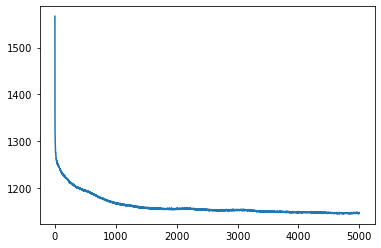

In [23]:
plt.plot(mae_history)

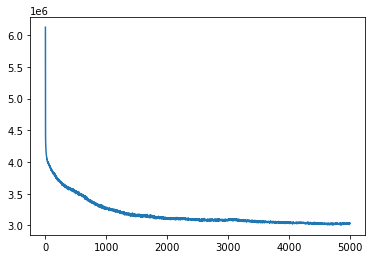

In [24]:
plt.plot(mse_history)